In [22]:
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
train_dir = "chest_xray/train/"
test_dir = "chest_xray/test/"
train_normal = f'{train_dir}NORMAL/'
train_pneumonia = f'{train_dir}PNEUMONIA/'
test_normal = f'{test_dir}NORMAL/'
test_pneumonia = f'{test_dir}PNEUMONIA/'

In [24]:
img = cv2.imread(f'{train_normal}IM-0115-0001.jpeg')

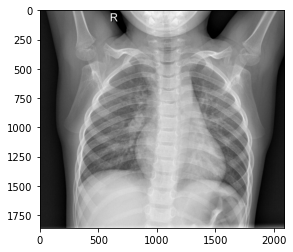

In [25]:
plt.imshow(img)

In [26]:
img.shape

(1858, 2090, 3)

In [27]:
image_gen = ImageDataGenerator(
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,)

In [28]:
image_gen.flow_from_directory(train_dir)

Found 5216 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_dir)

Found 624 images belonging to 2 classes.


In [30]:
input_shape = (150, 150, 3)

In [31]:
models = Sequential()

In [32]:
models.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))

models.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))

models.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))

models.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))

models.add(Flatten())

models.add(Dense(1500))
models.add(Activation('relu'))

models.add(Dense(512))
models.add(Activation('relu'))

models.add(Dense(128))
models.add(Activation('relu'))

models.add(Dense(32))
models.add(Activation('relu'))

models.add(Dropout(0.3))
models.add(Dense(1))
models.add(Activation('sigmoid'))

In [33]:
models.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [34]:
models.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 32)       

In [35]:
train_gen = image_gen.flow_from_directory(train_dir, target_size=input_shape[:2], batch_size=16, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [36]:
test_gen = image_gen.flow_from_directory(test_dir, target_size=input_shape[:2], batch_size=16, class_mode='binary')

Found 624 images belonging to 2 classes.


In [37]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [39]:
results = models.fit_generator(train_gen, epochs=10, steps_per_epoch=100, validation_data=test_gen, validation_steps=24)

Epoch 1/10
100/100 [==============================] - 217s 2s/step - loss: 0.6091 - accuracy: 0.7381 - val_loss: 0.7226 - val_accuracy: 0.6302
Epoch 2/10
100/100 [==============================] - 218s 2s/step - loss: 0.5383 - accuracy: 0.7469 - val_loss: 0.5577 - val_accuracy: 0.7214
Epoch 3/10
100/100 [==============================] - 256s 3s/step - loss: 0.4102 - accuracy: 0.7981 - val_loss: 0.9604 - val_accuracy: 0.6979
Epoch 4/10
100/100 [==============================] - 224s 2s/step - loss: 0.3811 - accuracy: 0.8238 - val_loss: 0.7589 - val_accuracy: 0.7240
Epoch 5/10
100/100 [==============================] - 217s 2s/step - loss: 0.3380 - accuracy: 0.8406 - val_loss: 0.5588 - val_accuracy: 0.7917
Epoch 6/10
100/100 [==============================] - 221s 2s/step - loss: 0.3165 - accuracy: 0.8637 - val_loss: 0.6432 - val_accuracy: 0.8047
Epoch 7/10
100/100 [==============================] - 214s 2s/step - loss: 0.2896 - accuracy: 0.8781 - val_loss: 0.5152 - val_accuracy: 0.7891

In [40]:
models.save('chest_xray_trained_model.h5')

In [43]:
print(results.history['accuracy'])

[0.7381250262260437, 0.746874988079071, 0.7981250286102295, 0.8237500190734863, 0.840624988079071, 0.8637499809265137, 0.878125011920929, 0.8675000071525574, 0.8700000047683716, 0.8968750238418579]


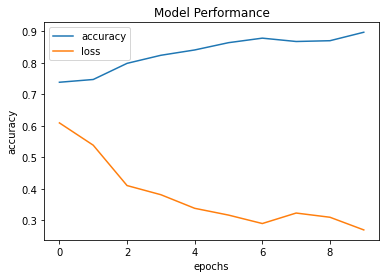

In [45]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title("Model Performance")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [63]:
normal_test_img = image.load_img(f'{test_normal}IM-0035-0001.jpeg', target_size=(150,150))
normal_test_img = image.img_to_array(normal_test_img)
print(normal_test_img.shape)
normal_test_img = np.expand_dims(normal_test_img, axis=0)
print(normal_test_img.shape)
normal_test_img = normal_test_img/255


(150, 150, 3)
(1, 150, 150, 3)


In [64]:
prediction = models.predict(normal_test_img)
print(prediction)

[[0.294799]]


In [65]:
result_1 = models.predict_classes(normal_test_img)
print(result_1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[0]]


In [61]:
pneumonia_test_img = image.load_img(f'{test_pneumonia}person1_virus_6.jpeg', target_size=(150,150))
pneumonia_test_img = image.img_to_array(pneumonia_test_img)
print(pneumonia_test_img.shape)
pneumonia_test_img = np.expand_dims(pneumonia_test_img, axis=0)
print(pneumonia_test_img.shape)
pneumonia_test_img = pneumonia_test_img/255

(150, 150, 3)
(1, 150, 150, 3)


In [62]:
prediction = models.predict(pneumonia_test_img)
print(prediction)

[[0.99740696]]


In [66]:
result_2 = models.predict_classes(pneumonia_test_img)
print(result_2)

[[1]]
